In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
dataset_sleep = pd.read_csv("C:/Users/ksmin/data_Science/dataset/Sleep_Data_Sampled.csv")
nRow, nCol = dataset_sleep.shape
print(dataset_sleep.info())
print(f'There are {nRow} rows and {nCol} columns')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                15000 non-null  int64  
 1   Gender                   15000 non-null  object 
 2   Age                      15000 non-null  int64  
 3   Occupation               15000 non-null  object 
 4   Sleep Duration           15000 non-null  float64
 5   Quality of Sleep         15000 non-null  int64  
 6   Physical Activity Level  15000 non-null  int64  
 7   Stress Level             15000 non-null  int64  
 8   BMI Category             15000 non-null  object 
 9   Blood Pressure           15000 non-null  object 
 10  Heart Rate               15000 non-null  int64  
 11  Daily Steps              15000 non-null  int64  
 12  Sleep Disorder           15000 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usage: 1.5+ MB
None
There are 1500

In [3]:
dataset_sleep.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [4]:
for i in dataset_sleep.columns:
    print(i,'\n',dataset_sleep[i].unique(),'\n')

Person ID 
 [    1     2     3 ... 14998 14999 15000] 

Gender 
 ['Male' 'Female'] 

Age 
 [35 42 34 32 37 33 44 40 36 46 38 48 30 31 41 45 39 50 54 43 47 56 49 28
 55 52 53 51 29 58 59 57 27] 

Occupation 
 ['Doctor' 'Teacher' 'Software Engineer' 'Lawyer' 'Engineer' 'Accountant'
 'Nurse' 'Scientist' 'Manager' 'Salesperson' 'Sales Representative'] 

Sleep Duration 
 [6.65 6.9  6.95 6.85 7.85 8.05 7.15 7.8  6.6  7.1  7.5  7.55 7.   8.
 7.45 7.35 7.75 7.6  6.8  7.25 7.7  6.55 7.3  8.1  7.2  6.1  8.15 8.2
 7.4  6.75 8.3  6.3  6.   8.4  7.65 8.25 7.05 6.7  7.95 6.2  6.15 8.35
 6.05 7.9  8.45 6.45 6.25 6.4  6.35 8.5  6.5  5.95 5.9  5.85 5.8 ] 

Quality of Sleep 
 [7 8 6 9 5 4] 

Physical Activity Level 
 [50 52 66 60 45 58 68 75 82 72 51 30 38 55 36 90 62 54 35 40 65 42 78 70
 85 48 61 80 44 41 46 47 56 88 31 34 32] 

Stress Level 
 [7 4 6 5 3 8] 

BMI Category 
 ['Normal Weight' 'Normal' 'Overweight' 'Obese'] 

Blood Pressure 
 ['120/80' '135/90' '126/83' '125/80' '130/85' '140/95' '115/75

In [5]:
dataset_sleep.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

In [6]:
X = dataset_sleep.iloc[:, [2, 4, 5, 6, 10, 11]]
y = dataset_sleep[['Stress Level']]

String_X = dataset_sleep[['Gender','Occupation','BMI Category', 'Blood Pressure','Sleep Disorder']]
encoder = LabelEncoder()
encoded_X = String_X.apply(encoder.fit_transform)

# X 데이터에 encode된 결과를 추가
X = pd.concat([X, encoded_X], axis=1)

In [7]:
#decision tree를 이용해서 어떤 feature가 제일 영향력이 있는 feature인 지 확인하기. 
dt_clf = DecisionTreeClassifier(random_state=1004)

#dt_clf_model = dt_clf.fit(X,y)
cv_scores = cross_val_score(dt_clf, X,y,cv=5)
print("Cross-validation scores:", cv_scores)
print("Average accuracy:", np.mean(cv_scores))

dt_clf_model = dt_clf.fit(X,y)
print(dt_clf_model.feature_importances_) 
#교차 검증을 5번 하였을 때 decision tree의 정확도는 93%이고 이 중 Stress level 영향력이 가장 큰 feature는 Sleep duration, physical activity level이다. 

Cross-validation scores: [0.86233333 0.986      0.99       0.95666667 0.884     ]
Average accuracy: 0.9357999999999999
[0.04104906 0.29320223 0.1361646  0.12844005 0.23162783 0.10844994
 0.00109785 0.0082682  0.00616371 0.0405738  0.00496273]


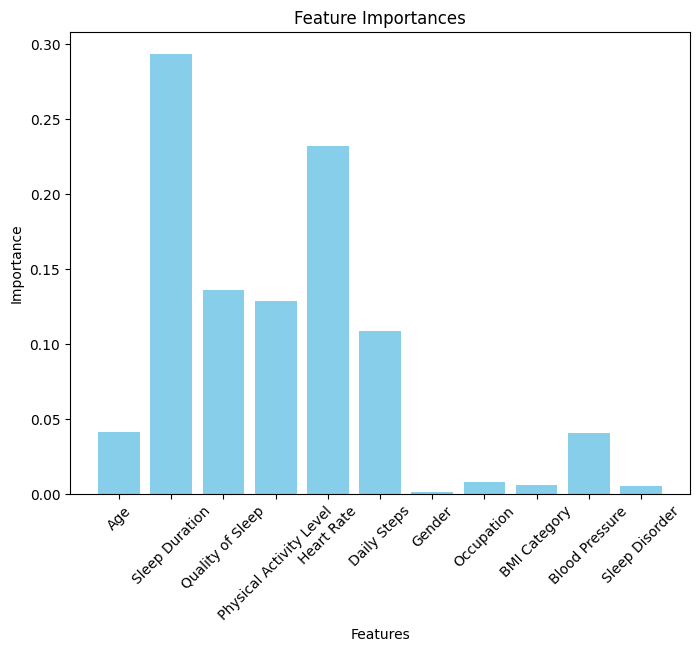

In [8]:
features = X.columns
importances = dt_clf_model.feature_importances_

plt.figure(figsize=(8, 6))
plt.bar(features, importances, color='skyblue')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

#Stress Level에 따른 영향력이 큰 feature는 Sleep Duration이다.


In [17]:
Sleep_duration_X = dataset_sleep.iloc[:,[2, 5, 6, 10, 11]]
Sleep_duration_y = dataset_sleep[["Sleep Duration"]]
print(Sleep_duration_y.dtypes)
Sleep_duration_String_X = dataset_sleep[['Gender','Occupation','BMI Category', 'Blood Pressure','Sleep Disorder']]
encoder = LabelEncoder()
Sleep_duration_encoded_X = String_X.apply(encoder.fit_transform)

Sleep_duration_X = pd.concat([Sleep_duration_X,Sleep_duration_encoded_X], axis=1)

Sleep Duration    float64
dtype: object


In [18]:
#decision tree를 이용해서 어떤 feature가 제일 영향력이 있는 feature인 지 확인하기. 
dt_clf = DecisionTreeClassifier(random_state=1004)

#dt_clf_model = dt_clf.fit(X,y)
cv_scores = cross_val_score(dt_clf, Sleep_duration_X,Sleep_duration_y.astype(int),cv=5)
print("Cross-validation scores:", cv_scores)
print("Average accuracy:", np.mean(cv_scores))

dt_clf_model = dt_clf.fit(Sleep_duration_X,Sleep_duration_y.astype(int))
print(dt_clf_model.feature_importances_) 
#교차 검증을 5번 하였을 때 decision tree의 정확도는 93%이고 이 중 Stress level 영향력이 가장 큰 feature는 Sleep duration, physical activity level이다. 

Cross-validation scores: [0.771      0.92233333 0.978      0.983      0.92766667]
Average accuracy: 0.9164
[0.03451631 0.75181112 0.07338592 0.04022465 0.06484524 0.00218174
 0.00413886 0.00163586 0.00398649 0.0232738 ]


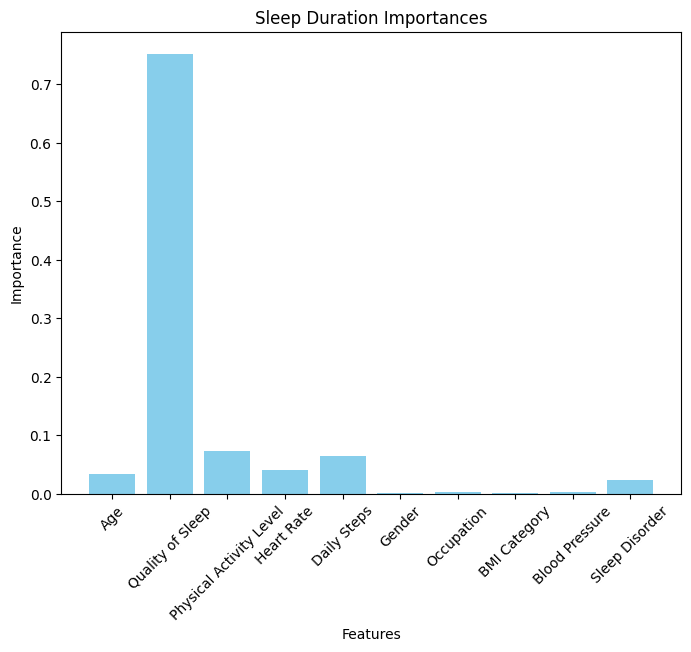

In [19]:
features = Sleep_duration_X.columns
importances = dt_clf_model.feature_importances_

plt.figure(figsize=(8, 6))
plt.bar(features, importances, color='skyblue')
plt.title('Sleep Duration Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()